# Machine Learning Assignment #1

### Group Members: 

           

Ali Subhan 337505

Abdur Rehman 337668

## Task 1

First, the Fisheriris dataset is loaded, and the data is shuffled randomly along with their corresponding labels. The first 100 samples are used for training, and the remaining 50 samples are designated for testing. Subsequently, scatter plots are generated for the first two dimensions of each class (Iris Setosa, Iris Versicolor, and Iris Virginica) to visualize the distribution of the data in the feature space.

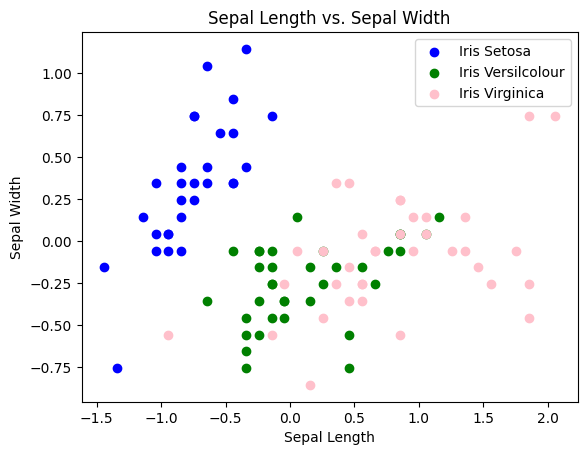

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

iris_data = scipy.io.loadmat('iris_data.mat')
data = iris_data['iris']

index_array = np.arange(len(data))
np.random.shuffle(index_array)

# Use the shuffled index array to shuffle the rows of the original array
shuffled_data = data[index_array]

# Divide into test and training
train = shuffled_data[0:100,:]
test = shuffled_data[100:150,:]

# Scatter plotting each class
X = train[:,:4]
y = train[:,4]
iris_setosa = X[y==1]
iris_versicolor = X[y==2]
iris_virginica = X[y==3]

plt.scatter(iris_setosa[:,0], iris_setosa[:,1], label='Iris Setosa', marker='o', color='blue')
plt.scatter(iris_versicolor[:,0], iris_versicolor[:,1], label='Iris Versilcolour', marker='o', color='green')
plt.scatter(iris_virginica[:,0], iris_virginica[:,1], label='Iris Virginica', marker='o', color='pink')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()

Now we implement a multivariate Gaussian classifier using the Gaussian discriminant function.

![Screenshot](./Screenshot.png)

The classification is performed by comparing the discriminant values for each class, and a confusion matrix is constructed to evaluate the classifier's performance on the test data.


A confusion matrix is a table that is often used to describe the performance of a classification algorithm on a set of data for which the true values are known. It helps in understanding the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

In [18]:
# Calculating class means from training set
m_1 = np.mean(iris_setosa)
m_2 = np.mean(iris_versicolor)
m_3 = np.mean(iris_virginica)

# Calculating class covariances from training set
S_1 = np.cov(np.transpose(iris_setosa))
S_2 = np.cov(np.transpose(iris_versicolor))
S_3 = np.cov(np.transpose(iris_virginica))

# Using class means, class covariances from the training set and the discriminant function equation to calculate the posteriors of the test data
X_test = test[:,:4]
y_test = test[:,4]
y_predict = np.zeros(np.shape(y_test))
for i in range(0,len(X_test)):
  diff_1 = X_test[i,:4] - m_1
  diff_2 = X_test[i,:4] - m_2
  diff_3 = X_test[i,:4] - m_3
  g_1 = -0.5 * np.log(np.linalg.det(S_1)) - 0.5 * np.dot(diff_1.T, np.dot(np.linalg.inv(S_1), diff_1)) + np.log(len(iris_setosa)/len(X))
  g_2 = -0.5 * np.log(np.linalg.det(S_2)) - 0.5 * np.dot(diff_2.T, np.dot(np.linalg.inv(S_2), diff_2)) + np.log(len(iris_versicolor)/len(X))
  g_3 = -0.5 * np.log(np.linalg.det(S_3)) - 0.5 * np.dot(diff_3.T, np.dot(np.linalg.inv(S_3), diff_3)) + np.log(len(iris_virginica)/len(X))


# Using g_1, g_2 and g_3 to predict the class
  if g_1 > g_2 and g_1 > g_3:
    y_predict[i] = 1
  elif g_2 > g_1 and g_2 > g_3:
    y_predict[i] = 2
  else:
    y_predict[i] = 3

# Making Confusion Matrix
a1p1, a1p2, a1p3 = 0, 0, 0
a2p1, a2p2, a2p3 = 0, 0, 0
a3p1, a3p2, a3p3 = 0, 0, 0

# Finding the confusion matrix
for i in range(0,len(y_test)):
    if y_test[i] == 1:
      if y_predict[i] == 1:
          a1p1 += 1
      elif y_predict[i] == 2:
          a1p2 += 1
      else:
          a1p3 += 1
    elif y_test[i] == 2:
      if y_predict[i] == 1:
          a2p1 += 1
      elif y_predict[i] == 2:
          a2p2 += 1
      else:
          a2p3 += 1
    else:
      if y_predict[i] == 1:
          a3p1 += 1
      elif y_predict[i] == 2:
          a3p2 += 1
      else:
          a3p3 += 1


Confusion_Matrix = np.array([[a1p1, a1p2, a1p3],
                    [a2p1, a2p2, a2p3],
                    [a3p1, a3p2, a3p3]])
print("Confusion Matrix:")
print(Confusion_Matrix)

Confusion Matrix:
[[ 2 15  0]
 [ 0 15  0]
 [ 0  2 16]]


In [19]:
print(len(iris_setosa), len(X))
print(len(iris_versicolor), len(X))
print(len(iris_virginica), len(X))

33 100
35 100
32 100


**Can you drop any term in the discriminant function? Why?**

We cannot drop the log(P(C_i)) term as the dataset is randomly suffled. If there were same number of examples for each class we could drop this term. You can also see the number of examples for each class out of hundred in the training set in the above cell.

## Task 2

Load US CDC data of weekly flu estimates over a year. The dataset includes weekly flu estimates for nine US regions (columns 2 to 10). Column 1 represents the date, and the last column (WtdILI) is the CDC's national estimate, taken as the label 'r'. Since there are nine regions against each date, this is d = 9 dimensional data. Save the data in a .mat file for use in Python. Find the parameters 'w' for the estimator g(x|w). Observe the structure of g(x|w), which should be [N × 1]. Plot both g(x|w) and the label vector 'r' on the same figure to compare.

In [17]:
from scipy.io import loadmat
import numpy as np
import copy, math
import matplotlib.pyplot as plt

### Data Loading

In [18]:
mat_file_path = 'Task2.mat'
mat_data = loadmat(mat_file_path)
x= mat_data['x']
y= mat_data['y']
y=y.reshape(-1)

### Finding Optimized Parameters via Multivariate Regression

We will apply Multivariate Regression and use Gradient Descent to find the parameters optimized for our data

In [19]:
b_init = np.random.random()
w_init = np.random.randn(9)
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (9,), b_init type: <class 'float'>


In [20]:
## Function to compute Cost
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [21]:
## Function to compute Gradients with respect to Parameters
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [22]:
## Applying Gradient Descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [23]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.001
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x, y, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {w_final} ")

Iteration    0: Cost     1.53   
Iteration  100: Cost     0.06   
Iteration  200: Cost     0.04   
Iteration  300: Cost     0.04   
Iteration  400: Cost     0.04   
Iteration  500: Cost     0.04   
Iteration  600: Cost     0.04   
Iteration  700: Cost     0.04   
Iteration  800: Cost     0.03   
Iteration  900: Cost     0.03   
b,w found by gradient descent: [0.14417156 0.13375692 0.13115593 0.16120135 0.13171027 0.13150147
 0.11128786 0.11977235 0.10959765] 


### Estimator Parameters

In [24]:
print(f"Parameters for Estimator found via Multivariate Regression are: \n{w_final} ")

Parameters for Estimator found via Multivariate Regression are: 
[0.14417156 0.13375692 0.13115593 0.16120135 0.13171027 0.13150147
 0.11128786 0.11977235 0.10959765] 


### Structure of g(x|w)

In [25]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      g_x (scalar):  prediction
    """
    g_x = np.dot(x, w) + b     
    return g_x 

In [26]:
# make a prediction
g_x = predict(x,w_final, b_final)
print(f"g(x|w) shape: {g_x.shape} \nprediction:\n {g_x}")

g(x|w) shape: (52,) 
prediction:
 [1.3823187  1.43947076 1.53170798 1.932004   1.87854997 1.87900801
 1.65343113 2.03059938 1.88861937 2.09984884 2.61744887 3.15204106
 2.8975227  2.32875604 2.07170889 2.26533936 2.39311382 2.63920973
 2.80669349 2.90983197 3.00822306 2.78312096 2.43645544 2.32354464
 2.14824046 1.8294515  1.5006217  1.28275987 1.24816789 1.18335966
 1.13320069 1.1101933  1.0500052  0.92896355 0.84658612 0.77748623
 0.72604168 0.68080043 0.66930077 0.6450514  0.60203622 0.6154197
 0.60259111 0.61486275 0.64216252 0.68722508 0.77433924 0.89119535
 1.06991858 1.28064848 1.3552863  1.38655078]


Hence we get the desired shape as (52,) which is same as expected (Nx1)

In [27]:
m,_ = x.shape
for i in range(m):
    print(f"prediction: {np.dot(x[i], w_final) + b_final:0.2f}, target value: {y[i]}")

prediction: 1.38, target value: 1.182
prediction: 1.44, target value: 1.22
prediction: 1.53, target value: 1.31
prediction: 1.93, target value: 1.343
prediction: 1.88, target value: 1.586
prediction: 1.88, target value: 1.47
prediction: 1.65, target value: 1.611
prediction: 2.03, target value: 1.827
prediction: 1.89, target value: 1.776
prediction: 2.10, target value: 1.941
prediction: 2.62, target value: 2.34
prediction: 3.15, target value: 3.086
prediction: 2.90, target value: 3.26
prediction: 2.33, target value: 2.613
prediction: 2.07, target value: 2.247
prediction: 2.27, target value: 2.352
prediction: 2.39, target value: 2.415
prediction: 2.64, target value: 2.521
prediction: 2.81, target value: 2.648
prediction: 2.91, target value: 3.127
prediction: 3.01, target value: 3.128
prediction: 2.78, target value: 3.142
prediction: 2.44, target value: 3.099
prediction: 2.32, target value: 2.655
prediction: 2.15, target value: 2.432
prediction: 1.83, target value: 2.319
prediction: 1.50,

### Plotting Labels against Predictions

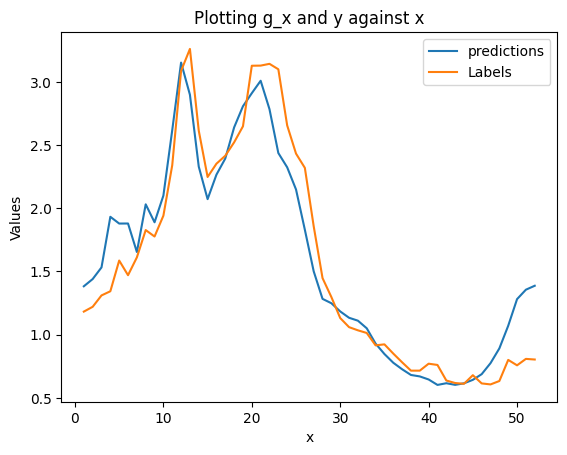

In [28]:
import matplotlib.pyplot as plt
import numpy as np
predictions= g_x
labels= y
index=np.array([i for i in range(len(predictions))])+1

plt.plot(index, predictions,label='predictions')
plt.plot(index, labels,label='Labels')

# Add labels and a title
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Plotting g_x and y against x')
plt.legend()

# Show the plot
plt.show()
